In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nba_api.stats.endpoints as nba_end
from nba_api.stats.static import teams, players
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.library.parameters import Season
from nba_api.stats.library.parameters import SeasonType
from nba_api.stats.endpoints import (
    CommonPlayerInfo, PlayerCareerStats, PlayerGameLog, PlayerProfileV2, CommonTeamYears, TeamPlayerDashboard, LeagueDashPlayerStats, TeamInfoCommon, PlayerGameLogs, PlayerIndex, CommonAllPlayers
)
import inspect, time, datetime, random
from pathlib import Path
import pickle

def load_pickle(path):
    with open(path, "rb") as f:
        return pickle.load(f)

def save_pickle(obj, path):
    path = Path(path)
    tmp = path.with_suffix(path.suffix + ".tmp")
    with open(tmp, "wb") as f:
        pickle.dump(obj, f, protocol=pickle.HIGHEST_PROTOCOL)
    os.replace(tmp, path)  # atomic replace

# Team Season Stats Example

In [22]:
okc_id = teams.find_team_by_abbreviation('OKC')['id']
okc_1415 = leaguegamefinder.LeagueGameFinder(team_id_nullable = okc_id,
                                 season_nullable = '2014-15',
                                 season_type_nullable = 'Regular Season')
cha_id = teams.find_team_by_abbreviation('CHI')['id']
cha_player_season = TeamPlayerDashboard(cha_id, season = '1971-72').get_data_frames()
cha_player_season[0]

,GROUP_SET,TEAM_ID,TEAM_NAME,GROUP_VALUE,GP,W,L,W_PCT,MIN,FGM,...,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK


In [23]:
cha_player_season

[Empty DataFrame
 Columns: [GROUP_SET, TEAM_ID, TEAM_NAME, GROUP_VALUE, GP, W, L, W_PCT, MIN, FGM, FGA, FG_PCT, FG3M, FG3A, FG3_PCT, FTM, FTA, FT_PCT, OREB, DREB, REB, AST, TOV, STL, BLK, BLKA, PF, PFD, PTS, PLUS_MINUS, GP_RANK, W_RANK, L_RANK, W_PCT_RANK, MIN_RANK, FGM_RANK, FGA_RANK, FG_PCT_RANK, FG3M_RANK, FG3A_RANK, FG3_PCT_RANK, FTM_RANK, FTA_RANK, FT_PCT_RANK, OREB_RANK, DREB_RANK, REB_RANK, AST_RANK, TOV_RANK, STL_RANK, BLK_RANK, BLKA_RANK, PF_RANK, PFD_RANK, PTS_RANK, PLUS_MINUS_RANK]
 Index: []
 
 [0 rows x 56 columns],
 Empty DataFrame
 Columns: [GROUP_SET, PLAYER_ID, PLAYER_NAME, NICKNAME, GP, W, L, W_PCT, MIN, FGM, FGA, FG_PCT, FG3M, FG3A, FG3_PCT, FTM, FTA, FT_PCT, OREB, DREB, REB, AST, TOV, STL, BLK, BLKA, PF, PFD, PTS, PLUS_MINUS, NBA_FANTASY_PTS, DD2, TD3, WNBA_FANTASY_PTS, GP_RANK, W_RANK, L_RANK, W_PCT_RANK, MIN_RANK, FGM_RANK, FGA_RANK, FG_PCT_RANK, FG3M_RANK, FG3A_RANK, FG3_PCT_RANK, FTM_RANK, FTA_RANK, FT_PCT_RANK, OREB_RANK, DREB_RANK, REB_RANK, AST_RANK, TOV_RANK

# Check Which nba_api Functions Work with Team_ID or Player_ID as Parameters

In [ ]:
# BoxScoreTraditionalV2 has basic stuff
clses = {}
for name, cls in inspect.getmembers(nba_end, inspect.isclass):
    lebron = ""
    team = ""
    try:
        clses[name] = cls('0021401222')
        team = 'TEAM'
    except:
        pass
    try:
        clses[name] = cls(2544)
        lebron = 'PLAYER'
    except:
        pass
    if len(lebron) + len(team) == 0:
        print('FAILED: ' + name)
        continue
    else:
        print(name, team, lebron)

FAILED: AllTimeLeadersGrids
FAILED: AssistLeaders
FAILED: AssistTracker
BoxScoreAdvancedV2 TEAM 
BoxScoreAdvancedV3 TEAM 
FAILED: BoxScoreDefensiveV2
BoxScoreFourFactorsV2 TEAM 
BoxScoreFourFactorsV3 TEAM 
FAILED: BoxScoreHustleV2
FAILED: BoxScoreMatchupsV3
BoxScoreMiscV2 TEAM 
BoxScoreMiscV3 TEAM 
BoxScorePlayerTrackV2 TEAM 
BoxScorePlayerTrackV3 TEAM 
BoxScoreScoringV2 TEAM 
BoxScoreScoringV3 TEAM 
BoxScoreSummaryV2 TEAM 
BoxScoreTraditionalV2 TEAM 
BoxScoreTraditionalV3 TEAM 
BoxScoreUsageV2 TEAM 
BoxScoreUsageV3 TEAM 
FAILED: CommonAllPlayers
CommonPlayerInfo TEAM PLAYER
FAILED: CommonPlayoffSeries
CommonTeamRoster TEAM PLAYER
FAILED: CommonTeamYears
FAILED: CumeStatsPlayer
CumeStatsPlayerGames TEAM PLAYER
FAILED: CumeStatsTeam
CumeStatsTeamGames TEAM PLAYER
FAILED: DefenseHub
FAILED: DraftBoard
FAILED: DraftCombineDrillResults
FAILED: DraftCombineNonStationaryShooting
FAILED: DraftCombinePlayerAnthro
FAILED: DraftCombineSpotShooting
FAILED: DraftCombineStats
FAILED: DraftHistory
F

# Retrieve All Denver Nuggets Game, Then Retrieve Box Scores from 04/17/2025 to 05/03/2025 (Nuggets Vs Clippers Playoff Series)

In [21]:
# GAME_DATE from LeagueGameFinder is stored a a string 'YYYY-MM-DD', use get_date to return it as datetime
def get_date(date):
    r = datetime.date(int(date[0:4]), int(date[5:7]), int(date[8:10]))
    return r
start = datetime.date(2025, 4, 17)
end = datetime.date(2025, 5, 3)
nuggets_all = leaguegamefinder.LeagueGameFinder(team_id_nullable='1610612743').get_normalized_dict()['LeagueGameFinderResults']
nuggets_clips = [i for i in nuggets_all if (get_date(i['GAME_DATE']) >= start and get_date(i['GAME_DATE']) <= end)]
nuggets_clips_ids = [i['GAME_ID'] for i in nuggets_clips]
nuggets_clips_tradish = [nba_end.BoxScoreTraditionalV2(game_id=i).get_normalized_dict()['PlayerStats'] for i in nuggets_clips_ids]
print(nuggets_clips_ids)

['0042400177', '0042400176', '0042400175', '0042400174', '0042400173', '0042400172', '0042400171']


## Plot Player Points from Game 1 of the Above Series

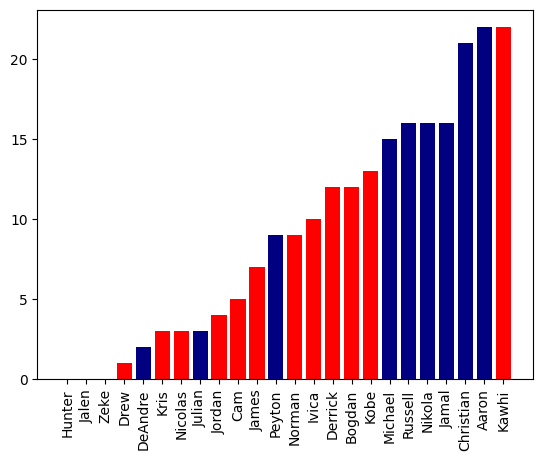

In [33]:
game1 = pd.DataFrame(nuggets_clips_tradish[0])
scorers = game1[['TEAM_ABBREVIATION', 'NICKNAME', 'PTS']].copy()
scorers.dropna(inplace = True)
scorers.sort_values('PTS', inplace = True)
colors = scorers['TEAM_ABBREVIATION'].map({'DEN':'navy', 'LAC':'red'})
plt.bar(scorers['NICKNAME'], scorers['PTS'], color = colors)
plt.xticks(rotation = 90)
scorers_nug = scorers.loc

# Explore the Strength of the Eastern and Western Conferences Per Season

In [39]:
# Define east and west team abbreviations
east = ['ATL', 'BKN', 'BOS', 'CHA', 'CHI', 'CLE', 'DET', 'IND', 'MIA', 'MIL', 'NYK', 'ORL', 'PHI', 'TOR', 'WAS']
west = ['DAL', 'DEN', 'GSW', 'HOU', 'LAC', 'LAL', 'MEM', 'MIN', 'NOP', 'OKC', 'PHX', 'POR', 'SAC', 'SAS', 'UTA']

# Some GPT function that prevents over-querying the api
CACHE = Path("nba_cache")
CACHE.mkdir(exist_ok=True)

def fetch_league_gamelog(season, max_tries=5, base_sleep=0.8):
    """Fetch one season with retries/backoff and polite pacing."""
    cache_file = CACHE / f"leaguegamelog_{season}.parquet"
    if cache_file.exists():
        return pd.read_parquet(cache_file)

    for k in range(max_tries):
        try:
            df = nba_end.LeagueGameLog(season=season, timeout=30).get_data_frames()[0]
            df.to_parquet(cache_file, index=False)
            # polite pacing after a successful call too
            time.sleep(base_sleep + random.uniform(0.0, 0.6))
            return df
        except Exception as e:
            wait = (2 ** k) * (0.6 + random.uniform(0.0, 0.6))  # jittered backoff
            print(f"[{season}] retry {k+1}/{max_tries} in {wait:.1f}s — {e}")
            time.sleep(wait)
    raise RuntimeError(f"Failed to fetch season {season} after {max_tries} tries.")

# Construct list that contains properly formatted year labels from 1975-2025
yr_range = []
for i in np.arange(50):
    year = (75 + i) % 100
    if year > 50:
        stro = f"19{year:02d}-{year+1:02d}"
    else:
        stro = f"20{year:02d}-{year+1:02d}"
    if year == 99:
        stro = "1999-00"
    yr_range.append(stro)

# Build dict containing east and west plus-minus for all games in a season
east_vs_west_by_season = {}
east_win_perc_by_year = []
for i in yr_range:
    df = fetch_league_gamelog(i)

    east_pm = []
    west_pm = []

    for game_id, subset in df.groupby('GAME_ID'):
        teams = subset['TEAM_ABBREVIATION']
        diff_confs = (teams.iloc[0] in east) + (teams.iloc[1] in east)
        if diff_confs == 1:
            if teams.iloc[0] in east:
                east_pm.append(subset['PLUS_MINUS'].iloc[0])
                west_pm.append(subset['PLUS_MINUS'].iloc[1])
            else:
                east_pm.append(subset['PLUS_MINUS'].iloc[1])
                west_pm.append(subset['PLUS_MINUS'].iloc[0])
    east_pm = np.array(east_pm)
    west_pm = np.array(west_pm)
    east_win_percentage = np.mean(east_pm > 0)
    west_win_percentage = np.mean(west_pm > 0)
    east_vs_west_by_season[i] = {'east': {'pm': east_pm, 'win_perc': east_win_percentage}, 'west': {'pm': west_pm, 'win_perc': west_win_percentage}}
    east_win_perc_by_year.append(east_win_percentage)
    print(i, end = '  ')

1975-76  1976-77  1977-78  1978-79  1979-80  1980-81  1981-82  1982-83  1983-84  1984-85  1985-86  1986-87  1987-88  1988-89  1989-90  1990-91  1991-92  1992-93  1993-94  1994-95  1995-96  1996-97  1997-98  1998-99  1999-00  2000-01  2001-02  2002-03  2003-04  2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  2010-11  2011-12  2012-13  2013-14  2014-15  2015-16  2016-17  2017-18  2018-19  2019-20  2020-21  2021-22  2022-23  2023-24  2024-25  

## Plot Strength Per Season (Win Percentage of East vs West Games)

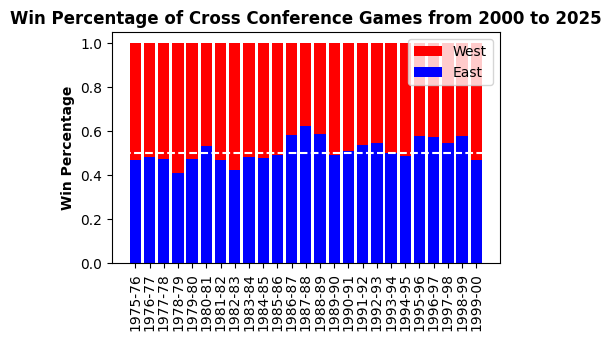

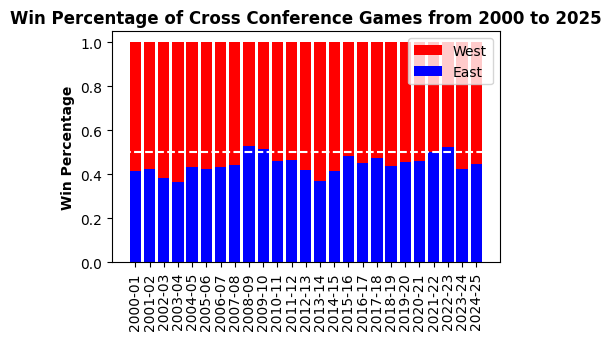

In [50]:
# Percentage plot for 1975-2000
plt.figure(figsize = (5,3))
plt.bar(yr_range[:25], np.array([1] * len(east_win_perc_by_year[:25])), color = 'red')
plt.bar(yr_range[:25], east_win_perc_by_year[:25], color = 'blue')
plt.xticks(rotation = 90 )
plt.ylabel('Win Percentage', fontweight = 'bold')
plt.legend(['West', 'East'])
plt.title('Win Percentage of Cross Conference Games from 2000 to 2025', fontweight = 'bold')
plt.axhline(0.5, linestyle = '--', color = 'white')

# Percentage plot for 2000-2025
plt.figure(figsize = (5,3))
plt.bar(yr_range[25:], np.array([1] * len(east_win_perc_by_year[25:])), color = 'red')
plt.bar(yr_range[25:], east_win_perc_by_year[25:], color = 'blue')
plt.xticks(rotation = 90 )
plt.ylabel('Win Percentage', fontweight = 'bold')
plt.legend(['West', 'East'])
plt.title('Win Percentage of Cross Conference Games from 2000 to 2025', fontweight = 'bold')
plt.axhline(0.5, linestyle = '--', color = 'white')
#plt.savefig('C:/Users/colli/Downloads/nba_east_west_win_perc.png', bbox_inches = 'tight', dpi = 300)

# Hoop Grid Cheating

In [2]:
player_list = players.get_players()
player_ids = [i['id'] for i in player_list]

def time_func(function):
    start = time.time()
    result = function
    end = time.time()
    elapsed = end - start
    print(f"Time Elapsed: {elapsed:.2f}")
    return result
    
def _sleep():
    time.sleep(0.5)  # NBA Stats is touchy; be nice

def team_id_from_abbr(abbr: str) -> int:
    abbr = abbr.upper()
    return next(d["id"] for d in teams.get_teams() if d["abbreviation"] == abbr)

def season_strings(min_year: int, max_year: int):
    # e.g., 1970..2025 -> "1970-71", ..., "2024-25"
    for y in range(min_year, max_year + 1):
        yield f"{y}-{str((y+1) % 100).zfill(2)}"

def create_year_range(start, end):
    yr_range = []
    for i in range(start, end):
        beg = i
        end = (i+1) % 100
        entry = f"{beg:02d}-{end:02d}"
        yr_range.append(entry)
    return yr_range
        
def players_who_ever_played_for(team_abbreviation):
    team_dict = {}
    team_id = teams.find_team_by_abbreviation(team_abbreviation)['id']
    info = TeamInfoCommon(team_id).get_data_frames()[0]
    start = int(info['MIN_YEAR'].item())
    end = int(info['MAX_YEAR'].item())
    yr_range = create_year_range(start, end)
    for j in yr_range:
        print(j, end = ' ')
        roster = TeamPlayerDashboard(team_id=team_id, season=j).get_data_frames()[1]
        roster.dropna(subset='PLAYER_ID', inplace = True)
        team_dict.update(dict(zip(roster["PLAYER_ID"].astype(int), roster["PLAYER_NAME"])))
        time.sleep(1.3)
    ids = list(team_dict.keys())
    for i in ids:
        if team_dict[i] == None:
            team_dict.pop(i)
    return team_dict

def filter_by_stat(player_ids, stat, threshold, above_or_below):
    id_list = []
    for i in player_ids:
        try:
            career_stats = PlayerCareerStats(player_id=i).get_data_frames()[0]
        except:
            print(f"Failed to Fetch Career Stats for Player ID: #{i}")
        if above_or_below:
            if career_stats[stat].max() > threshold:
                id_list.append(i)
        else:
            if career_stats.min() < threshold:
                id_list.append(i)
        _sleep()
    return id_list

team_list = ['ATL', 'BKN', 'BOS', 'CHA', 'CHI', 'CLE', 'DET', 'IND', 'MIA', 'MIL', 'NYK', 'ORL', 'PHI', 'TOR', 'WAS', 'DAL', 'DEN', 'GSW', 'HOU', 'LAC', 'LAL', 'MEM', 'MIN', 'NOP', 'OKC', 'PHX', 'POR', 'SAC', 'SAS', 'UTA']

full_dicts = {}
num = 0
for i in team_list[-2:]:
    full_dicts[i] = players_who_ever_played_for(i)
    num += 1
    print(i)    
        
#heat_ids = time_func(players_who_ever_played_for('MIA'))
#block_above_100_heat_ids = time_func(filter_by_stat(heat_ids, 'BLK', 100, True))

1976-77 1977-78 1978-79 1979-80 1980-81 1981-82 1982-83 1983-84 1984-85 1985-86 1986-87 1987-88 1988-89 1989-90 1990-91 1991-92 1992-93 1993-94 1994-95 1995-96 1996-97 1997-98 1998-99 1999-00 2000-01 2001-02 2002-03 2003-04 2004-05 2005-06 2006-07 2007-08 2008-09 2009-10 2010-11 2011-12 2012-13 2013-14 2014-15 2015-16 2016-17 2017-18 2018-19 2019-20 2020-21 2021-22 2022-23 2023-24 2024-25 SAS
1975-76 1976-77 1977-78 1978-79 1979-80 1980-81 1981-82 1982-83 1983-84 1984-85 1985-86 1986-87 1987-88 1988-89 1989-90 1990-91 1991-92 1992-93 1993-94 1994-95 1995-96 1996-97 1997-98 1998-99 1999-00 2000-01 2001-02 2002-03 2003-04 2004-05 2005-06 2006-07 2007-08 2008-09 2009-10 2010-11 2011-12 2012-13 2013-14 2014-15 2015-16 2016-17 2017-18 2018-19 2019-20 2020-21 2021-22 2022-23 2023-24 2024-25 UTA


In [116]:
pid_array = np.array(player_ids)
pid_rand = pid_array.copy()
np.random.shuffle(pid_rand)

bio = CommonPlayerInfo(player_id=pid).get_data_frames()[0]
career = PlayerCareerStats(player_id=pid).get_data_frames()[0]
pgamelog = PlayerGameLog(player_id=pid).get_data_frames()[0]
comtem = CommonTeamYears('00').get_data_frames()[0]
tpd = TeamPlayerDashboard(1610612737).get_data_frames()[0]
ldps = LeagueDashPlayerStats().get_data_frames()[0]

In [1]:
heat_ids = [105, 136, 173, 180, 202, 291, 297, 335, 390, 469, 702, 703, 896, 900, 982, 1109, 1110, 1134, 1477, 55, 103, 190, 226, 371, 699, 777, 785, 1520, 221, 320, 345, 707, 898, 901, 1853, 1906, 1934, 1942, 76, 193, 224, 258, 920, 931, 957, 1554, 1729, 2067, 111, 383, 393, 423, 694, 754, 1735, 1752, 2081, 2124, 2229, 2347, 696, 2253, 2256, 2406, 2446, 238, 902, 955, 961, 1747, 1885, 1917, 2254, 2548, 2602, 2617, 2632, 120, 363, 406, 445, 1000, 1720, 1800, 2039, 2417, 2748, 56, 952, 1507, 1715, 1899, 2574, 2809, 2853, 101134, 101190, 200809, 200823, 358, 1548, 1890, 2470, 2556, 2739, 2867, 200784, 200792, 201161, 201186, 201202, 201336, 979, 2048, 2592, 2733, 101129, 200081, 200821, 201563, 201596, 2047, 2306, 101183, 436, 711, 956, 980, 1710, 2034, 2544, 2547, 23027, 45611, 45612, 45613, 45616, 45617, 201015, 201976, 202081, 202148, 202238, 202354, 202363, 2201, 2203, 101142, 202227, 202708, 951, 1740, 2365, 51261, 51262, 51263, 51264, 51266, 51267, 51268, 51269, 51270, 51271, 51272, 51273, 51274, 51275, 202725, 2427, 51647, 51648, 51649, 51650, 51653, 51654, 51655, 51656, 51657, 51658, 51659, 51660, 51661, 51662, 51854, 51855, 51856, 51857, 51858, 51860, 51861, 51862, 51863, 51864, 51866, 51867, 51868, 201141, 201962, 202732, 203120, 2736, 42682, 42683, 42684, 42685, 42686, 42687, 42688, 42689, 42690, 42691, 42692, 42693, 42694, 42695, 43068, 43069, 43070, 43071, 43072, 43073, 43075, 43076, 43077, 43078, 43079, 61020, 101122, 200761, 200769, 201177, 201609, 201611, 202355, 203263, 203516, 203894, 203958, 204020, 204054, 2207, 2405, 2757, 44197, 44198, 44199, 44200, 44201, 44203, 44204, 44206, 44207, 44208, 44209, 44210, 44211, 44212, 44214, 44828, 44830, 44832, 44833, 44834, 44835, 44837, 44838, 44839, 44840, 44843, 44844, 101123, 203950, 1626159, 1626196, 1627362, 52103, 52104, 52105, 52106, 52107, 52108, 52109, 52110, 52113, 52114, 52115, 52116, 52117, 56230, 56231, 56232, 56234, 56235, 56236, 56237, 56238, 56239, 56240, 56241, 56242, 56243, 56244, 56245, 56246, 56247, 201949, 201961, 202337, 202682, 203079, 203186, 203585, 1627855, 56431, 56432, 56433, 56434, 56435, 56436, 56438, 56439, 56440, 56442, 203482, 203658, 1626175, 1626722, 1627773, 1627884, 1628389, 1628475, 1628476, 56487, 56490, 56494, 56495, 56498, 201583, 1626173, 1626363, 1628095, 1628477, 1628999, 1629095, 1629130, 1629150, 2738, 57001, 57002, 57003, 57004, 57005, 57006, 202710, 203086, 203109, 203524, 1628429, 1629133, 1629134, 1629216, 1629613, 1629639, 1629644, 1629734, 1629735, 2772, 202340, 202357, 203090, 203473, 203506, 1629622, 1630173, 26804, 26805, 26806, 200768, 200782, 202693, 203917, 1628539, 1628997, 1629000, 1629312, 1629657, 1630209, 1630585, 1630597, 1630606, 1630610, 1630612, 1630639, 1630676, 201567, 203469, 1630696, 1631107, 1631115, 1631123, 1631258, 1631286, 1631287, 1631288, 1631289, 1631290, 27700, 27701, 27702, 27703, 27704, 27705, 27706, 201988, 1626153, 1626179, 1628418, 1630181, 1631170, 1631214, 1631306, 1641809, 27777, 27778, 202692, 203937, 203952, 1630528, 1630558, 1631122, 1641796, 1641815, 1641915, 1641925, 1641985, 1642276, 1642352, 1642389]
block_above_100_heat_ids = [136, 297, 190, 221, 258, 111, 961, 1885, 2548, 406, 1548, 1890, 201202, 979, 2048, 200081, 956, 980, 2547, 23027, 45611, 45612, 45613, 45616, 45617, 201015, 2203, 101142, 2365, 51261, 51262, 51263, 51264, 51266, 51267, 51268, 51269, 51270, 51271, 51272, 51273, 51274, 51275, 202355, 2405]
working = [136, 297, 190, 221, 258, 111, 961, 1885, 2548, 406, 1548, 1890, 201202, 979, 2048, 200081, 980, 2547, 2203, 101142, 2365]

In [ ]:
team_list = ['BOS']
for i in team_list:
    team_dict = {}
    team_id = teams.find_team_by_abbreviation(i)['id']
    info = TeamInfoCommon(team_id).get_data_frames()[0]
    start = int(info['MIN_YEAR'].item())
    end = int(info['MAX_YEAR'].item())
    yr_range = create_year_range(start, end)
    for j in yr_range:
        roster = TeamPlayerDashboard(team_id=team_id, season=j).get_data_frames()[1]
        team_dict.update(dict(zip(roster["PLAYER_ID"].astype(int), roster["PLAYER_NAME"])))
        time.sleep(1)
        print(j)
team_dict

In [3]:
# played_in_60s = []
# played_in_70s = []
# played_in_80s = []
# played_in_90s = []
# played_in_00s = []
# played_in_10s = []
# played_in_20s = []

range_60s = np.arange(1960,1970)
range_70s = np.arange(1970,1980)
range_80s = np.arange(1980, 1990)
range_90s = np.arange(1990, 2000)
range_00s = np.arange(2000,2010)
range_10s = np.arange(2010, 2020)
range_20s = np.arange(2020,2030)

# index_counter = 0

for i in player_ids[index_counter:]:
    info = CommonPlayerInfo(i).get_data_frames()[0]
    from_year = info['FROM_YEAR']
    to_year = info['TO_YEAR']
    if (len(from_year) == 1) and (len(to_year) == 1):
        from_item = from_year.item()
        to_item = to_year.item()
        year_range = np.arange(from_item, to_item + 1)
        if np.isin(range_60s, year_range).any():
            played_in_60s.append(i)
        if np.isin(range_70s, year_range).any():
            played_in_70s.append(i)
        if np.isin(range_80s, year_range).any():
            played_in_80s.append(i)
        if np.isin(range_90s, year_range).any():
            played_in_90s.append(i)
        if np.isin(range_00s, year_range).any():
            played_in_00s.append(i)
        if np.isin(range_10s, year_range).any():
            played_in_10s.append(i)
        if np.isin(range_20s, year_range).any():
            played_in_20s.append(i)
    index_counter += 1
    if index_counter % 100 == 0:
        print(index_counter)
    time.sleep(0.4)

file_names = ["1960_players.pkl", "1970_players.pkl","1980_players.pkl","1990_players.pkl","2000_players.pkl","2010_players.pkl","2020_players.pkl"]
data_lists = [played_in_60s, played_in_70s, played_in_80s, played_in_90s, played_in_00s, played_in_10s, played_in_20s]

for i in range(7):
    with open(file_names[i], "wb") as f:
        pickle.dump(data_lists[i], f, protocol=pickle.HIGHEST_PROTOCOL)

5000


In [58]:
players.find_players_by_last_name('Durant')
logs = []
for i in create_year_range(2006,2025):
    jo = PlayerGameLog(player_id=201142, season = i, season_type_all_star='Playoffs').get_data_frames()[0]
    logs.append(jo)
    print(jo.shape)
    time.sleep(1)

(0, 27)
(0, 27)
(0, 27)
(6, 27)
(17, 27)
(20, 27)
(11, 27)
(19, 27)
(0, 27)
(18, 27)
(15, 27)
(21, 27)
(12, 27)
(0, 27)
(12, 27)
(4, 27)
(11, 27)
(4, 27)
(0, 27)


In [61]:
kd_log_df = pd.DataFrame(columns = jo.columns)
for i in logs:
    kd_log_df = pd.concat([kd_log_df, i])
kd_log_df.reset_index(inplace = True)

C:\Users\colli\AppData\Local\Temp\ipykernel_26612\2590880846.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  kd_log_df = pd.concat([kd_log_df, i])


In [76]:
kd_log_df
serieses = []
series = []
wtot = 0
pt1 = "OKC"
pt2 = "LAL"
for i in range(kd_log_df.shape[0]):
    gid = kd_log_df.loc[i]
    t1 = gid['MATCHUP'][:3]
    t2 = gid['MATCHUP'][-3:]
    if ((pt1 == t1) and (pt2 == t2)) or ((pt1 == t2) and (pt2 == t1)):
        series.append(i)
        if gid['WL'] == 'W':
            wtot += 1
    else:
        serieses.append((series, wtot))
        pt1 = t1
        pt2 = t2
        series = []
        wtot = 0
        series.append(i)
        if gid['WL'] == 'W':
            wtot += 1

In [84]:
relavent = []
for i in serieses:
    if i[1] < 4:
        relavent.extend(i[0])
print(serieses)
print(relavent)
kd_losses = kd_log_df.loc[relavent]
kd_losses
game_ids = np.unique(kd_losses['Game_ID'])
game_ids

[([0, 1, 2, 3, 4, 5], 2), ([6, 7, 8, 9, 10], 1), ([11, 12, 13, 14, 15, 16, 17], 4), ([18, 19, 20, 21, 22], 4), ([23, 24, 25, 26, 27], 1), ([28, 29, 30, 31, 32, 33], 4), ([34, 35, 36, 37, 38], 4), ([39, 40, 41, 42], 4), ([43, 44, 45, 46, 47], 1), ([48, 49, 50, 51, 52, 53], 4), ([54, 55, 56, 57, 58, 59], 2), ([60, 61, 62, 63, 64, 65], 4), ([66, 67, 68, 69, 70, 71, 72], 4), ([73, 74, 75, 76, 77, 78, 79], 3), ([80, 81, 82, 83, 84, 85], 4), ([86, 87, 88, 89, 90], 4), ([91, 92, 93, 94, 95], 4), ([96, 97, 98, 99], 4), ([100, 101, 102, 103], 4), ([104, 105], 2), ([106, 107, 108, 109], 4), ([110, 111, 112, 113, 114, 115, 116], 4), ([117, 118, 119, 120, 121], 4), ([122, 123, 124, 125, 126], 4), ([127], 1), ([128, 129, 130, 131, 132], 3), ([133, 134, 135, 136, 137, 138], 4), ([139, 140, 141, 142, 143, 144, 145], 3), ([146, 147, 148, 149, 150, 151, 152, 153, 154], 4), ([155, 156, 157, 158, 159, 160], 2), ([161, 162, 163, 164, 165], 4)]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 23, 24, 25, 26, 27, 43, 44,

array(['0040900141', '0040900142', '0040900143', '0040900144',
       '0040900145', '0040900146', '0041000311', '0041000312',
       '0041000313', '0041000314', '0041000315', '0041100401',
       '0041100402', '0041100403', '0041100404', '0041100405',
       '0041200221', '0041200222', '0041200223', '0041200224',
       '0041200225', '0041300311', '0041300312', '0041300313',
       '0041300314', '0041300315', '0041300316', '0041500311',
       '0041500312', '0041500313', '0041500314', '0041500315',
       '0041500316', '0041500317', '0041600141', '0041600144',
       '0041800221', '0041800222', '0041800223', '0041800224',
       '0041800225', '0041800405', '0042000211', '0042000212',
       '0042000213', '0042000214', '0042000215', '0042000216',
       '0042000217', '0042200221', '0042200222', '0042200223',
       '0042200224', '0042200225', '0042200226'], dtype=object)

In [104]:
opponent_ids = []
for i in game_ids:
    df = nba_end.BoxScoreTraditionalV3(game_id = i).get_data_frames()[0]
    kd_team = df.loc[np.where(df['familyName'] == "Durant"), 'teamTricode'].item()
    opponents = df.loc[np.where(df['teamTricode'] != kd_team)]
    for i in np.unique(opponents['personId']):
        if i not in opponent_ids:
            opponent_ids.append(i)
    time.sleep(1.2)

In [105]:
po = [j for j in mil_atp if j in opponent_ids]
print(len(mil_atp))
print(len(opponent_ids))
print(len(jo))

dicto = {}
for i in po:
    try:
        jo = PlayerCareerStats(i).get_data_frames()[0]
        name = players.find_player_by_id(i)['full_name']
        seasons = jo.shape[0]
        points = np.sum(jo['PTS'])
        games_played = np.sum(jo['GP'])
        games_started = np.sum(jo['GS'])
        minutes_played = np.sum(jo['MIN'])
        last_season = jo.loc[(seasons - 1), 'SEASON_ID']
        dicto[i] = {'Seasons': seasons, 'GP': games_played, 'GS': games_started, 'MP': minutes_played, 'Last': last_season}
        print(name + f" \t\t\t Seasons: {seasons:.2f}\t Points: {points:.2f}\t GP: {games_played:.2f}\t GS: {games_started:.2f}\t Min: {minutes_played:.2f}\t" + last_season)
        time.sleep(2)
    except:
        print(i)

454
144
16
Andrew Bogut 			 Seasons: 16.00	 Points: 6887.00	 GP: 733.00	 GS: 682.00	 Min: 20445.00	2018-19
Jodie Meeks 			 Seasons: 12.00	 Points: 5269.00	 GP: 599.00	 GS: 204.00	 Min: 12829.00	2018-19
Keyon Dooling 			 Seasons: 13.00	 Points: 5067.00	 GP: 728.00	 GS: 86.00	 Min: 14134.00	2012-13
Shaun Livingston 			 Seasons: 20.00	 Points: 5969.00	 GP: 947.00	 GS: 226.00	 Min: 19669.00	2018-19
Jon Leuer 			 Seasons: 10.00	 Points: 2451.00	 GP: 405.00	 GS: 80.00	 Min: 6132.00	2018-19
DJ Mbenga 			 Seasons: 9.00	 Points: 497.00	 GP: 276.00	 GS: 4.00	 Min: 1892.00	2010-11
Ish Smith 			 Seasons: 26.00	 Points: 7728.00	 GP: 1123.00	 GS: 247.00	 Min: 20883.00	2023-24
203114.0
203507.0
Jerryd Bayless 			 Seasons: 15.00	 Points: 6226.00	 GP: 729.00	 GS: 132.00	 Min: 15667.00	2018-19
Jason Terry 			 Seasons: 19.00	 Points: 18881.00	 GP: 1410.00	 GS: 679.00	 Min: 42034.00	2017-18
Axel Toupane 			 Seasons: 5.00	 Points: 112.00	 GP: 37.00	 GS: 1.00	 Min: 460.00	2020-21
Pau Gasol 			 Seasons: 22.0

In [162]:
bos_atp = load_pickle('BOS_all_time_players.pkl')

po = [j for j in bos_atp.keys() if j in opponent_ids]
print(len(bos_atp))
print(len(opponent_ids))
print(len(po))

dicto = {}
for i in po:
    try:
        jo = PlayerCareerStats(i).get_data_frames()[0]
        name = players.find_player_by_id(i)['full_name']
        seasons = jo.shape[0]
        points = np.sum(jo['PTS'])
        games_played = np.sum(jo['GP'])
        games_started = np.sum(jo['GS'])
        minutes_played = np.sum(jo['MIN'])
        last_season = jo.loc[(seasons - 1), 'SEASON_ID']
        dicto[i] = {'Seasons': seasons, 'GP': games_played, 'GS': games_started, 'MP': minutes_played, 'Last': last_season}
        print(name + f" \t\t\t Seasons: {seasons:.2f}\t Points: {points:.2f}\t GP: {games_played:.2f}\t GS: {games_started:.2f}\t Min: {minutes_played:.2f}\t" + last_season)
        time.sleep(2)
    except:
        print(i)

307
144
15
Tony Allen 			 Seasons: 14.00	 Points: 6654.00	 GP: 820.00	 GS: 441.00	 Min: 18053.00	2017-18
Gerald Green 			 Seasons: 14.00	 Points: 6565.00	 GP: 688.00	 GS: 118.00	 Min: 13387.00	2018-19
Jeff Green 			 Seasons: 25.00	 Points: 17971.00	 GP: 1498.00	 GS: 826.00	 Min: 41353.00	2024-25
Keyon Dooling 			 Seasons: 13.00	 Points: 5067.00	 GP: 728.00	 GS: 86.00	 Min: 14134.00	2012-13
Jason Terry 			 Seasons: 19.00	 Points: 18881.00	 GP: 1410.00	 GS: 679.00	 Min: 42034.00	2017-18
Leandro Barbosa 			 Seasons: 16.00	 Points: 9743.00	 GP: 914.00	 GS: 112.00	 Min: 19766.00	2016-17
Jerryd Bayless 			 Seasons: 15.00	 Points: 6226.00	 GP: 729.00	 GS: 132.00	 Min: 15667.00	2018-19
Joel Anthony 			 Seasons: 12.00	 Points: 1092.00	 GP: 523.00	 GS: 110.00	 Min: 7242.00	2016-17
Evan Turner 			 Seasons: 12.00	 Points: 7955.00	 GP: 786.00	 GS: 351.00	 Min: 21397.00	2019-20
Tayshaun Prince 			 Seasons: 19.00	 Points: 12558.00	 GP: 1157.00	 GS: 999.00	 Min: 35605.00	2015-16
Aron Baynes 			 Season

In [164]:
jo.columns

Index(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [168]:
kob_df = nba_end.PlayerAwards(opponent_ids[1]).get_data_frames()[0]

In [176]:
for i in opponent_ids:
    try:
        df = nba_end.PlayerAwards(i).get_data_frames()[0]
        allsteezy = np.sum(df['DESCRIPTION'] == 'NBA All-Star')
        if allsteezy >= 3:
            print(players.find_player_by_id(i), i, allsteezy)
    except:
        print(i)
    time.sleep(1)

{'id': 977, 'full_name': 'Kobe Bryant', 'first_name': 'Kobe', 'last_name': 'Bryant', 'is_active': False} 977 18
{'id': 2200, 'full_name': 'Pau Gasol', 'first_name': 'Pau', 'last_name': 'Gasol', 'is_active': False} 2200 6
{'id': 467, 'full_name': 'Jason Kidd', 'first_name': 'Jason', 'last_name': 'Kidd', 'is_active': False} 467 10
{'id': 978, 'full_name': 'Peja Stojakovic', 'first_name': 'Peja', 'last_name': 'Stojakovic', 'is_active': False} 978 3
{'id': 1717, 'full_name': 'Dirk Nowitzki', 'first_name': 'Dirk', 'last_name': 'Nowitzki', 'is_active': False} 1717 14
{'id': 1890, 'full_name': 'Shawn Marion', 'first_name': 'Shawn', 'last_name': 'Marion', 'is_active': False} 1890 4
{'id': 2544, 'full_name': 'LeBron James', 'first_name': 'LeBron', 'last_name': 'James', 'is_active': True} 2544 21
{'id': 2547, 'full_name': 'Chris Bosh', 'first_name': 'Chris', 'last_name': 'Bosh', 'is_active': False} 2547 11
{'id': 2548, 'full_name': 'Dwyane Wade', 'first_name': 'Dwyane', 'last_name': 'Wade', 'is_

In [180]:
OKC_atp = load_pickle('OKC_all_time_players.pkl')
print(len(OKC_atp))
GSW_atp = load_pickle('GSW_all_time_players.pkl')
print(len(GSW_atp))
MIL_atp = load_pickle("MIL_all_time_players.pkl")
print(len(MIL_atp))

385
466
454


In [185]:
# 1) clean intersection of IDs (dedupe + order stable)
po = [pid for pid in list(bos_atp) if pid in OKC_atp]

# 2) figure out a nice name column width dynamically
def player_name(pid):
    rec = players.find_player_by_id(int(pid)) or {}
    return rec.get("full_name") or str(pid)

NAME_W = max(18, max(len(player_name(pid)) for pid in po))

# 3) header
hdr = (
    f"{'Name':<{NAME_W}}  "
    f"{'Seasons':>7}  {'PTS':>8}  {'GP':>6}  {'GS':>6}  {'MIN':>8}  {'Last':>7}"
)
rule = "-" * len(hdr)
print(hdr)
print(rule)

# 4) rows
dicto = {}
for pid in po:
    try:
        df = PlayerCareerStats(int(pid)).get_data_frames()[0].copy()

        # coerce numerics safely
        for col in ("PTS", "GP", "MIN", "GS"):
            if col in df:
                df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0)

        seasons        = len(df)
        points         = int(df["PTS"].sum()) if "PTS" in df else 0
        games_played   = int(df["GP"].sum())  if "GP"  in df else 0
        games_started  = int(df["GS"].sum())  if "GS"  in df else 0
        minutes_played = int(round(df["MIN"].sum())) if "MIN" in df else 0
        last_season    = str(df["SEASON_ID"].iloc[-1]) if seasons else ""

        name = player_name(pid)
        dicto[pid] = {
            "Seasons": seasons, "GP": games_played, "GS": games_started,
            "MP": minutes_played, "Last": last_season
        }

        # aligned print (no tabs)
        print(
            f"{name:<{NAME_W}}  "
            f"{seasons:7d}  {points:8d}  {games_played:6d}  {games_started:6d}  {minutes_played:8d}  {last_season:>7}"
        )
        time.sleep(0.5)  # be polite to the API if you're looping a lot

    except Exception as e:
        # keep output aligned even on errors
        print(f"{str(pid):<{NAME_W}}  {'ERR':>7}  {'-':>8}  {'-':>6}  {'-':>6}  {'-':>8}  {'':>7}  # {e}")



Name                 Seasons       PTS      GP      GS       MIN     Last
-------------------------------------------------------------------------
Pervis Ellison            11      4494     474     245     11592  2000-01
Kenny Anderson            22     13160    1092     835     31950  2004-05
Vitaly Potapenko          15      4578     693     245     13359  2006-07
Adrian Griffin            11      1984     512     181      8309  2007-08
Danny Fortson             10      3615     440     175      8837  2006-07
Rick Brunson              15      1308     426      51      5398  2005-06
Joseph Forte               2        30      25       0       124  2002-03
Mikki Moore               19      3681     674     201     11897  2011-12
Ruben Wolkowyski           2        80      41       1       329  2002-03
Shammond Williams         11      2774     456      43      7757  2006-07
Vin Baker                 17     12405     872     637     27241  2005-06
Chucky Atkins             17      8177

In [17]:
chi = teams.find_team_by_abbreviation('CHI')
tpd = TeamPlayerDashboard(team_id = chi['id'], season = '1999-00')
tpd.get_data_frames()[1]

,GROUP_SET,PLAYER_ID,PLAYER_NAME,NICKNAME,GP,W,L,W_PCT,MIN,FGM,...,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,TEAM_COUNT
0,Players,769,B.J. Armstrong,B.J.,27,5,22,0.185,583.221667,83,...,6,6,13,12,10,15,5,1,15,1
1,Players,1512,Chris Anstey,Chris,73,13,60,0.178,1005.901667,161,...,14,18,2,5,7,5,2,1,4,1
2,Players,713,Chris Carr,Chris,50,12,38,0.240,1089.666667,185,...,17,11,7,3,14,8,5,1,6,1
3,Players,1736,Corey Benjamin,Corey,48,8,40,0.167,862.831667,145,...,9,13,13,8,13,11,5,1,10,1
4,Players,2000,Dedric Willoughby,Dedric,25,2,23,0.080,507.093333,61,...,7,5,12,13,4,14,5,1,14,1
5,Players,54,Dickey Simpkins,Dickey,69,16,53,0.232,1656.453333,111,...,18,19,1,10,17,7,5,1,7,1
6,Players,1882,Elton Brand,Elton,81,17,64,0.210,2996.611667,630,...,20,20,3,1,20,1,1,1,1,1
7,Players,697,Fred Hoiberg,Fred,31,4,27,0.129,845.388333,89,...,8,10,11,11,11,13,5,1,12,1
8,Players,765,Hersey Hawkins,Hersey,61,12,49,0.197,1620.993333,159,...,15,15,7,4,18,3,5,1,3,1
9,Players,317,John Starks,John,4,1,3,0.250,82.755000,11,...,1,3,17,18,2,18,5,1,18,1


In [22]:
df = LeagueDashPlayerStats(
            season='1998-99',
            per_mode_detailed="Totals",
            timeout=30
        ).get_data_frames()[0]

In [29]:
df.loc[df['TEAM_ABBREVIATION'] == 'CHI']

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,TEAM_COUNT
27,457,Andrew Lang,Andrew,1610612741,CHI,33.0,21,6,15,0.286,...,319,211,159,394,437,374,144,12,383,1
53,82,Bill Wennington,Bill,1610612741,CHI,36.0,38,10,28,0.263,...,209,343,159,331,485,334,206,12,336,1
66,699,Brent Barry,Brent,1610612741,CHI,27.0,37,10,27,0.270,...,319,406,159,146,552,155,144,12,147,1
92,1869,Charles R. Jones,Charles R.,1610612741,CHI,23.0,29,5,24,0.172,...,227,159,159,366,514,365,206,12,358,1
120,1736,Corey Benjamin,Corey,1610612741,CHI,21.0,31,8,23,0.258,...,299,221,159,356,507,388,206,12,387,1
124,1757,Cory Carr,Cory,1610612741,CHI,23.0,42,9,33,0.214,...,391,291,159,307,531,318,206,12,320,1
158,54,Dickey Simpkins,Dickey,1610612741,CHI,27.0,50,13,37,0.260,...,544,493,159,122,558,110,55,12,110,1
285,1522,Keith Booth,Keith,1610612741,CHI,24.0,39,9,30,0.231,...,462,266,49,352,529,325,206,12,330,1
306,1600,Kornel David,Kornel,1610612741,CHI,27.0,50,13,37,0.260,...,354,368,159,205,551,223,117,12,226,1
340,712,Mario Bennett,Mario,1610612741,CHI,25.0,3,1,2,0.333,...,87,42,159,524,304,524,206,12,528,1


In [18]:
chi = load_pickle("CHI_all_time_players.pkl")
chi

{82: 'Bill Wennington',
 183: 'Bison Dele',
 23: 'Dennis Rodman',
 54: 'Dickey Simpkins',
 679: 'Jason Caffey',
 146: 'Jud Buechler',
 26: 'Luc Longley',
 1099: 'Matt Steigenga',
 893: 'Michael Jordan',
 753: 'Randy Brown',
 305: 'Robert Parish',
 166: 'Ron Harper',
 937: 'Scottie Pippen',
 70: 'Steve Kerr',
 389: 'Toni Kukoc',
 710: 'David Vaughn',
 170: 'Joe Kleine',
 1522: 'Keith Booth',
 1601: 'Rusty LaRue',
 197: 'Scott Burrell',
 457: 'Andrew Lang',
 699: 'Brent Barry',
 1869: 'Charles R. Jones',
 1736: 'Corey Benjamin',
 1757: 'Cory Carr',
 1600: 'Kornel David',
 712: 'Mario Bennett',
 95: 'Mark Bryant',
 769: 'B.J. Armstrong',
 1512: 'Chris Anstey',
 713: 'Chris Carr',
 2000: 'Dedric Willoughby',
 1882: 'Elton Brand',
 697: 'Fred Hoiberg',
 765: 'Hersey Hawkins',
 317: 'John Starks',
 234: 'Khalid Reeves',
 1930: 'Lari Ketner',
 1074: 'Matt Maloney',
 1897: 'Metta World Peace',
 1913: 'Michael Ruffin',
 781: 'Will Perdue',
 2062: 'A.J. Guyton',
 1802: 'Brad Miller',
 1724: 'Bry

In [191]:
for i in GSW_atp:
    try:
        df = nba_end.PlayerAwards(i).get_data_frames()[0]
        allsteezy = np.sum(df['DESCRIPTION'] == 'NBA All-Star')
        if allsteezy >= 3:
            print(players.find_player_by_id(i)['full_name'], i, allsteezy)
    except:
        print(i)
    time.sleep(0.5)

Latrell Sprewell 84 4
Mark Price 899 4
Chris Mullin 904 5
Gilbert Arenas 2240 3
1601
2049
2061
2073
2253
2452
2554
905
965
1738
1884
2059
2206
2401
2560
2740
2784
101113
101145
101147
101198
101223
1536
1733
2402
2440
2693
2694
101180
101194
101235
200753
200970
185
1506
1607
1753
2788
2837
22050
22051
22052
22053
22054
30003
200588
200785
201148
201158
201186
201228
1894
2037
2447
22070
23011
23012
23013
23015
23016
23017
101142
200766
200811
201176
201390
201576
201613
201627
30080
30081
30082
30201
Stephen Curry 201939 11
6663990
23079
23084
30101
45304
45305
45660
45661
201005
Klay Thompson 202691 5
51195
51196
51197
51199
51202
51203
51204
51205
51206
51207
51209
51210
51212
51214
51215
53020
Draymond Green 203110 4
Jermaine O'Neal 979 6
42019
51764
51765
51766
51767
51768
51769
51770
51771
51772
51773
51774
51776
51778
51779
51781
42890
42891
42893
42895
42896
42897
42898
42899
42900
42901
42902
42903
42904
42905
42906
42907
44559
44560
44561
44562
44563
44564
44565
44566
44567
4

In [119]:
act = pd.read_csv("C:/Users/colli/Downloads/sat.csv")
comb = act.loc[np.where(act['TEST_CMPNT_TYP_CD'] == 'Combined Test Score')]

In [121]:
print(comb['INSTN_AVG_SCORE_VAL'][0:10])

0      997.5
4     1016.1
8     1022.7
12       TFS
16     970.9
20    1022.5
24     978.3
28    1030.2
32    1062.9
36    1043.3
Name: INSTN_AVG_SCORE_VAL, dtype: object


<BarContainer object of 380 artists>

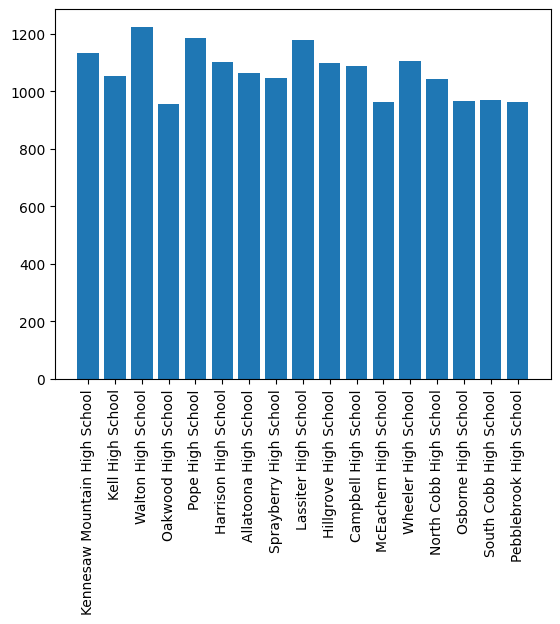

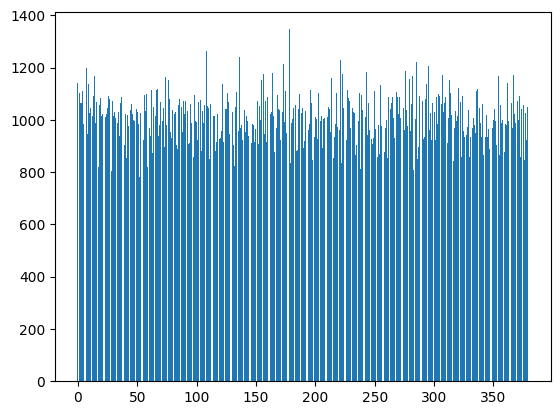

In [118]:

cobb = act.loc[np.where((act['SCHOOL_DSTRCT_NM'] == 'Cobb County') & (act['TEST_CMPNT_TYP_CD'] == 'Combined Test Score'))]
plt.bar(cobb['INSTN_NAME'], cobb['INSTN_AVG_SCORE_VAL'].astype(np.float64))
plt.xticks(rotation = 90)

plt.figure()
comb = comb.loc[comb['INSTN_AVG_SCORE_VAL'] != 'TFS']
comb['INSTN_AVG_SCORE_VAL'] = comb['INSTN_AVG_SCORE_VAL'].astype(np.float64)
comb.index = np.argsort(comb['INSTN_AVG_SCORE_VAL'])
plt.bar(comb.index, comb['INSTN_AVG_SCORE_VAL'].astype(np.float64))

(array([99., 38., 39., 37., 40., 37., 38., 37., 36., 37.]),
 array([  0. ,  35.5,  71. , 106.5, 142. , 177.5, 213. , 248.5, 284. ,
        319.5, 355. ]),
 <BarContainer object of 10 artists>)

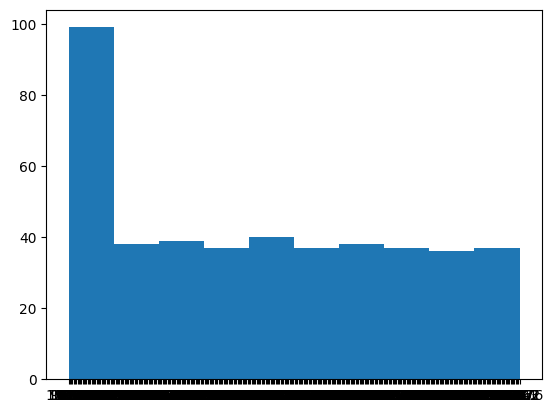

In [59]:
comb.loc[comb['INSTN_NAME'] == 'Sprayberry High School']
plt.hist(comb['INSTN_AVG_SCORE_VAL'])

In [76]:
cobb['INSTN_AVG_SCORE_VAL'].astype(np.float64)

340    1134.2
344    1053.2
352    1224.9
356     956.3
360    1186.0
364    1102.0
372    1064.7
380    1046.3
384    1177.4
388    1097.1
396    1086.4
400     964.0
404    1106.1
408    1043.6
412     966.3
416     969.7
420     961.3
Name: INSTN_AVG_SCORE_VAL, dtype: float64